# 7 Step grid transformation to align JP'gridded variables with WCVI model domain

### 1) Unstagger the U and V velocities of JP's model output (interpolate the U and V velocities of JP to the T grid points of JP)

In [44]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib as mpl
import os,sys
import numpy as np
from salishsea_tools import viz_tools, geo_tools,nc_tools
from grid_alignment import calculate_initial_compass_bearing as cibc
from scipy.interpolate import griddata, interp1d
import matplotlib.cm as cm
%matplotlib inline

###### Load JP's T-points data 

In [2]:
fname_T = '/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20160513_00874080_grid_T.nc'

##### Let's look at the variables inside the grid_T file

In [3]:
nc_tools.show_variables(nc.Dataset(fname_T))
nc_tools.show_dimensions(nc.Dataset(fname_T))

odict_keys(['nav_lon', 'nav_lat', 'deptht', 'time_counter', 'time_counter_bnds', 'votemper', 'vosaline', 'sosstsst', 'sosaline', 'sossheig', 'sowaflup', 'sowaflcd', 'sosalflx', 'sohefldo', 'soshfldo', 'somxl010', 'somixhgt', 'soicecov', 'sohefldp', 'sosafldp', 'sowafldp', 'sobowlin'])
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 715

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 1021

<class 'netCDF4._netCDF4.Dimension'>: name = 'deptht', size = 50

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 1

<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2



#### Lets locate the lat and lon of the T grid points

In [4]:
with nc.Dataset(fname_T, 'r') as cnc:
    nav_lon_T = cnc.variables['nav_lon'][:]; nav_lat_T = cnc.variables['nav_lat'][:]

    
print(nav_lon_T.shape, nav_lat_T.shape)

(1021, 715) (1021, 715)


#### Let's see where the lat and lon of the U and V grid data lie from the other 2 output files (U and V)

In [5]:
fname_U, fname_V = '/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20160513_00874080_grid_U.nc', \
                      '/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20160513_00874080_grid_V.nc'

##### Let's look at the variables inside the grid_U and grid_V files

In [6]:
nc_tools.show_variables(nc.Dataset(fname_U))
nc_tools.show_dimensions(nc.Dataset(fname_U))

odict_keys(['nav_lon', 'nav_lat', 'depthu', 'time_counter', 'time_counter_bnds', 'vozocrtx', 'sozotaux'])
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 715

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 1021

<class 'netCDF4._netCDF4.Dimension'>: name = 'depthu', size = 50

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 1

<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2



In [7]:
nc_tools.show_variables(nc.Dataset(fname_V))
nc_tools.show_dimensions(nc.Dataset(fname_V))

odict_keys(['nav_lon', 'nav_lat', 'depthv', 'time_counter', 'time_counter_bnds', 'vomecrty', 'sometauy'])
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 715

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 1021

<class 'netCDF4._netCDF4.Dimension'>: name = 'depthv', size = 50

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 1

<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2



In [8]:
with nc.Dataset(fname_U, 'r') as cnu:
    nav_lon_U = cnu.variables['nav_lon'][:]; nav_lat_U = cnu.variables['nav_lat'][:]
    
    
print(nav_lon_U.shape, nav_lat_U.shape)

(1021, 715) (1021, 715)


In [9]:
u_vel = nc.Dataset(fname_U)
v_vel = nc.Dataset(fname_V)

In [10]:
ugrid = u_vel.variables['vozocrtx']
vgrid = v_vel.variables['vomecrty']
zlevels = u_vel.variables['depthu']
timesteps = u_vel.variables['time_counter']

#### Unstagger the U and V velocities from U and V grid points of JP to his T points

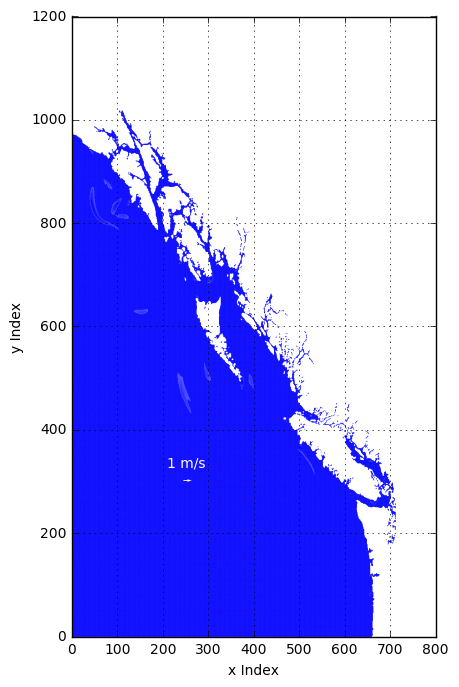

In [11]:
# Define the slice to plot
t, zlevel = 0, 0
# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel,...], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, ...], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
quiver = ax.quiver(u_tzyx, v_tzyx, color='blue', pivot='mid')
ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.quiverkey(quiver, 252, 302, 4, '1 m/s', coordinates='data', color='white', labelcolor='white')

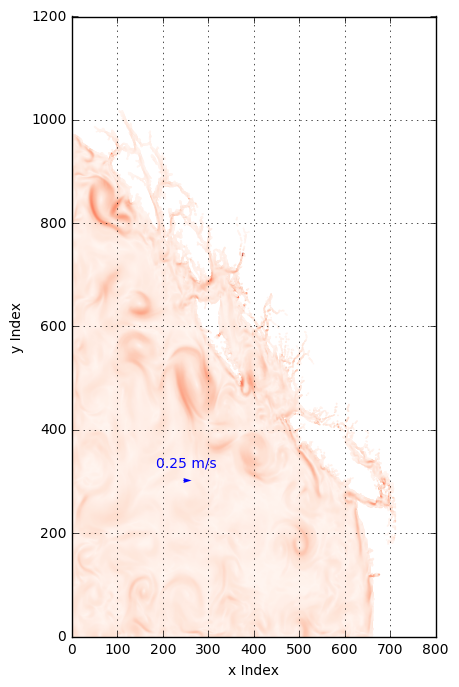

In [12]:
# Define the slice to plot
t, zlevel = 0, 0
# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel,...], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, ...], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))

# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
quiver = ax.quiver(u_tzyx, v_tzyx, speeds, pivot='mid', cmap='Reds', width=0.005)
ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.quiverkey(quiver, 252, 302, 4, '0.25 m/s', coordinates='data', color='blue', labelcolor='blue')

## 2) To calculate the bearing angle of JP's grid from a rectangular domain in CCW sense (his domain is rotated as shown in the figure below)
   #### The bearing is calculated for each of JP's T points


   <img src="files/JP_Grid.png">





In [13]:
fname_coord = "/data/mdunphy/NEP036-N30-OUT/INV/coordinates.nc"

#lat_bnds, lon_bnds = [45, 53], [-135, -123]




with nc.Dataset(fname_coord, 'r') as cnc:
    glamt = cnc.variables['glamt'][:]; gphit = cnc.variables['gphit'][:]
    glamu = cnc.variables['glamu'][:]; gphiu = cnc.variables['gphiu'][:]
    glamv = cnc.variables['glamv'][:]; gphiv = cnc.variables['gphiv'][:]
    
   
## slice out portion of JP's domain which interests us    
#lon_inds = np.where((glamt > lon_bnds[0]) & (glamt < lon_bnds[1]))
#lat_inds = np.where((gphit > lat_bnds[0]) & (gphit < lat_bnds[1]))

#glamt_sliced = glamt[lon_inds[0],lon_inds[1]]


# First point
lonA = glamu[:,0:-1]
latA = gphiu[:,0:-1]
# Second point
lonB = glamu[:,1:]
latB = gphiu[:,1:]



In [14]:
print(glamu.shape)
print(lonA.shape)

(1021, 715)
(1021, 714)


In [15]:
bearing = np.zeros(lonA.shape)
for j in range(lonA.shape[0]):
    for i in range(lonA.shape[1]):
        bearing[j,i] = cibc((latA[j,i],lonA[j,i]),(latB[j,i],lonB[j,i]))

In [16]:
bearing1 = cibc((latA,lonA),(latB,lonB))  # no loop neeeded


In [17]:
np.max(np.abs(bearing-bearing1))

0.0

In [18]:
print(bearing.shape)

(1021, 714)


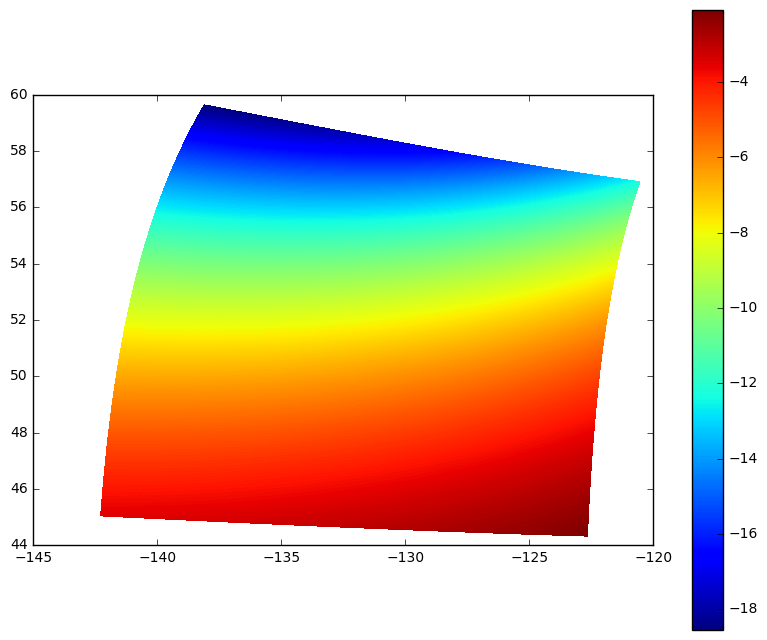

In [56]:
bearing_actual = 90 - bearing



fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(glamt, gphit, bearing_actual)
fig.colorbar(mesh)

In [20]:
u_tzyx.shape

(1020, 714)

## 3) We rotate the U and V velocities of JP to E-N direction 


 #### When we unstagger u and v (u_tzyx, v_tzyx) have one grid point less than their previous counterparts (u_grid and v_grid)

 #### To this extent we need to calculate the magnitude (speed) and taninv(V/U) to make them into vectors and rotate them into the East North frame. It must be remembered that we could have made use of the rotation matrix (although intuitively that's what comes to mind when we mention rotation). I did figure out a caveat to that step while I was doing this but I cannot remember what now (may have something to do with ascertaining the working of the roation)

In [21]:


mag_vel = np.sqrt(np.multiply(u_tzyx,u_tzyx), np.multiply(v_tzyx,v_tzyx))


ang_vel = np.degrees(np.arctan2(v_tzyx, u_tzyx))


print(ang_vel.shape)

print(mag_vel.shape)

print(bearing_actual.shape)

bearing_actual_cut = bearing_actual[1:,:]

print(bearing_actual_cut.shape)


#Let us make the bearing and angle of same shape so that we can add the angle to the bearing

#Ny,Nx = ang_vel.shape

#J = slice(0, Ny-1)
#I = slice(0, Nx-1)

#ang_vel = ang_vel[J,I]
#mag_vel = mag_vel[J,I]


print(ang_vel.shape)
print(mag_vel.shape)

(1020, 714)
(1020, 714)
(1021, 714)
(1020, 714)
(1020, 714)
(1020, 714)


##### We rotate the grid and compare JP's velocty angles (in his rotated grid) with the unrotated velocity angles (angle the velocity vectors make in E-N grids) in the pcolor plots below

##### Both the plots have the velocities at JP's T grid points up until now

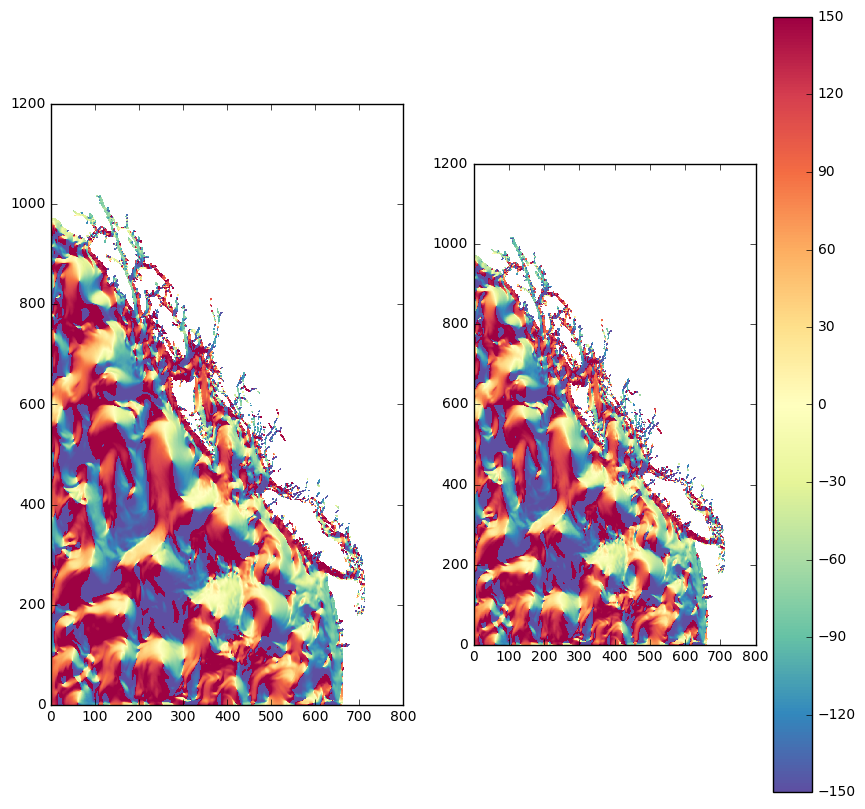

In [71]:
angle_unrotated = ang_vel + bearing_actual_cut;

fig, (ax0, ax1) = plt.subplots(ncols=2,figsize=(10,10))

mesh = ax0.pcolormesh(ang_vel, cmap =cm.Spectral_r, vmin=-150, vmax=150)
viz_tools.set_aspect(ax0)

mesh = ax1.pcolormesh(angle_unrotated, cmap =cm.Spectral_r, vmin=-150, vmax=150)
viz_tools.set_aspect(ax1)
fig.colorbar(mesh,ax=ax1)

plt.draw()
plt.show()

##### Here we compute the u and v components of the velocities in our new E-N grid

In [23]:
u_unrotated = mag_vel*np.cos(np.radians(angle_unrotated))

v_unrotated = mag_vel*np.sin(np.radians(angle_unrotated))



##### Let's plot the quiver of velocities in JP's grid and E-N north grid to see how they fare

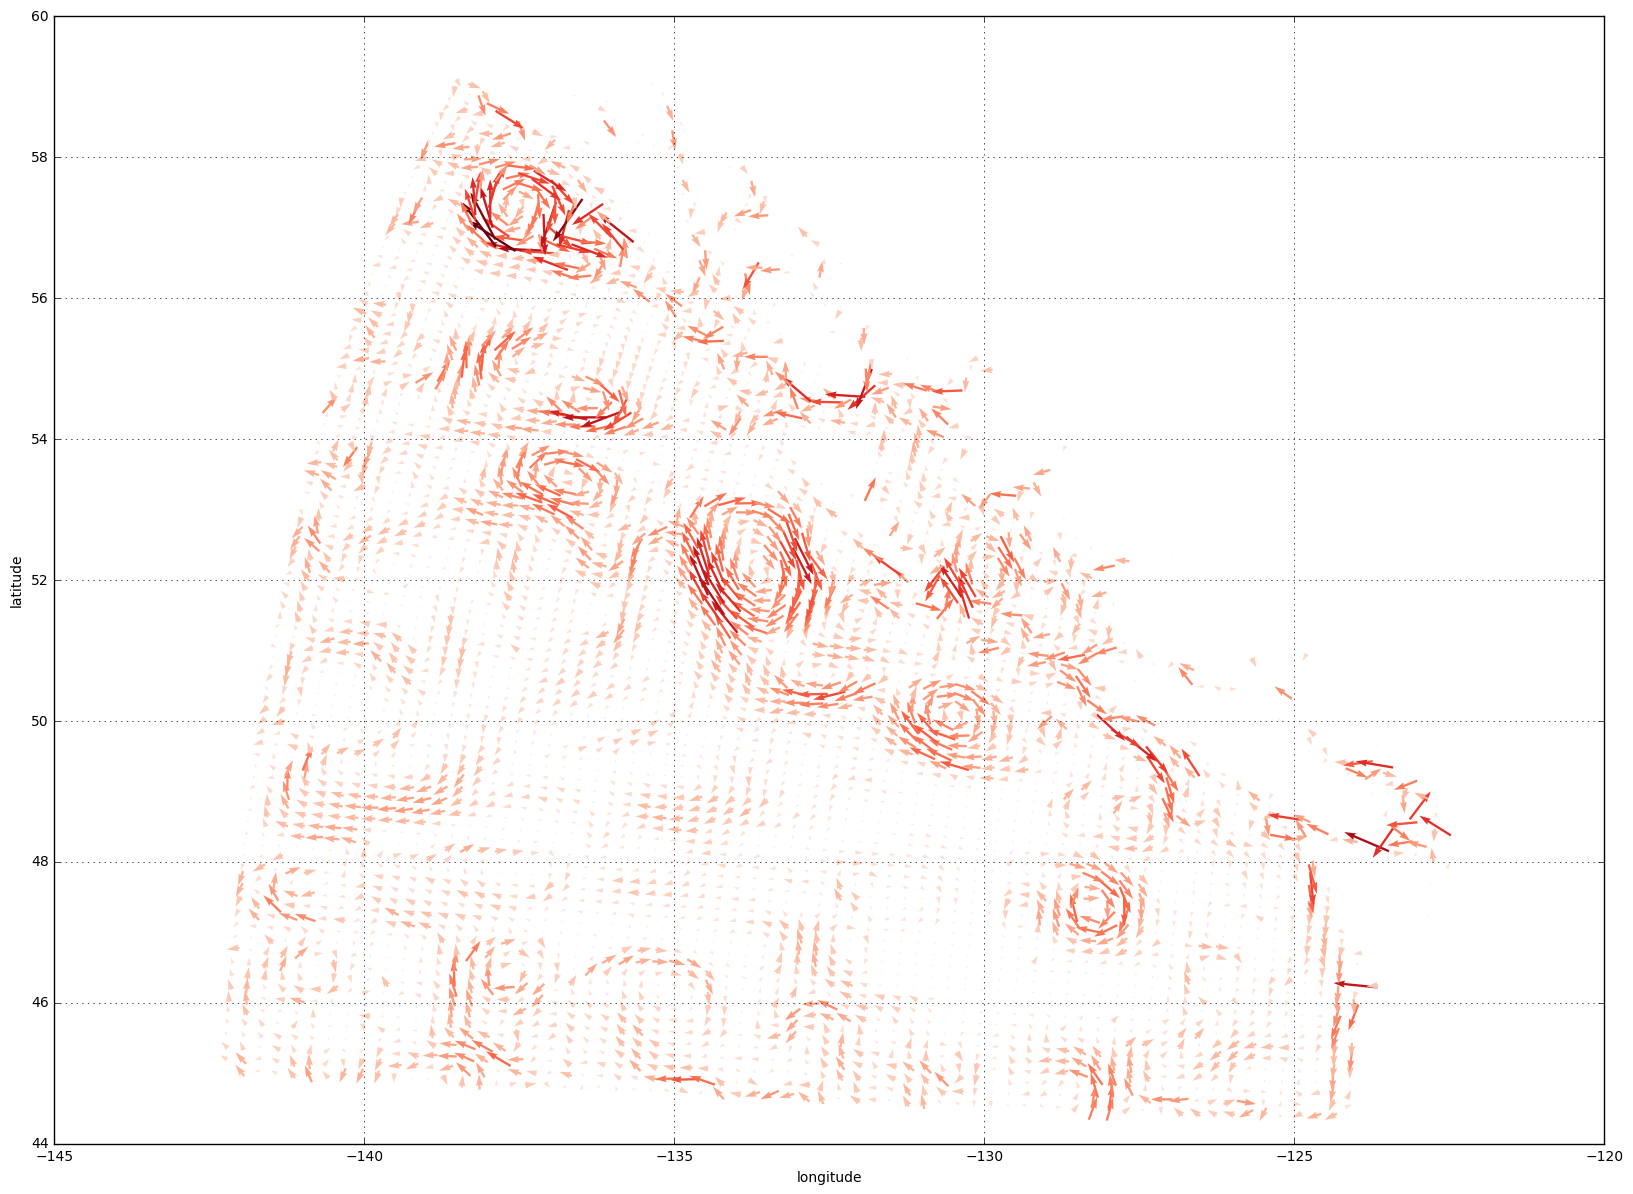

In [77]:
#From JP's Grid



# mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel,...], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel,...], 0)

speeds = np.sqrt(np.square(ugrid_tzyx) + np.square(vgrid_tzyx))

# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
viz_tools.set_aspect(ax)


arrowsteps = 10
x_slice = ugrid_tzyx[::arrowsteps,::arrowsteps]
y_slice = vgrid_tzyx[::arrowsteps,::arrowsteps]
speed_slice = speeds[::arrowsteps, ::arrowsteps]
xjt=glamt[::arrowsteps, ::arrowsteps]
yjt=gphit[::arrowsteps, ::arrowsteps]
quiver = ax.quiver(xjt,yjt,x_slice, y_slice, speed_slice, pivot='mid', cmap='Reds', width=0.0015)
ax.grid()
# Axes label and title
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.quiverkey(quiver, 252, 302, 4, '0.25 m/s', coordinates='data', color='blue', labelcolor='blue')

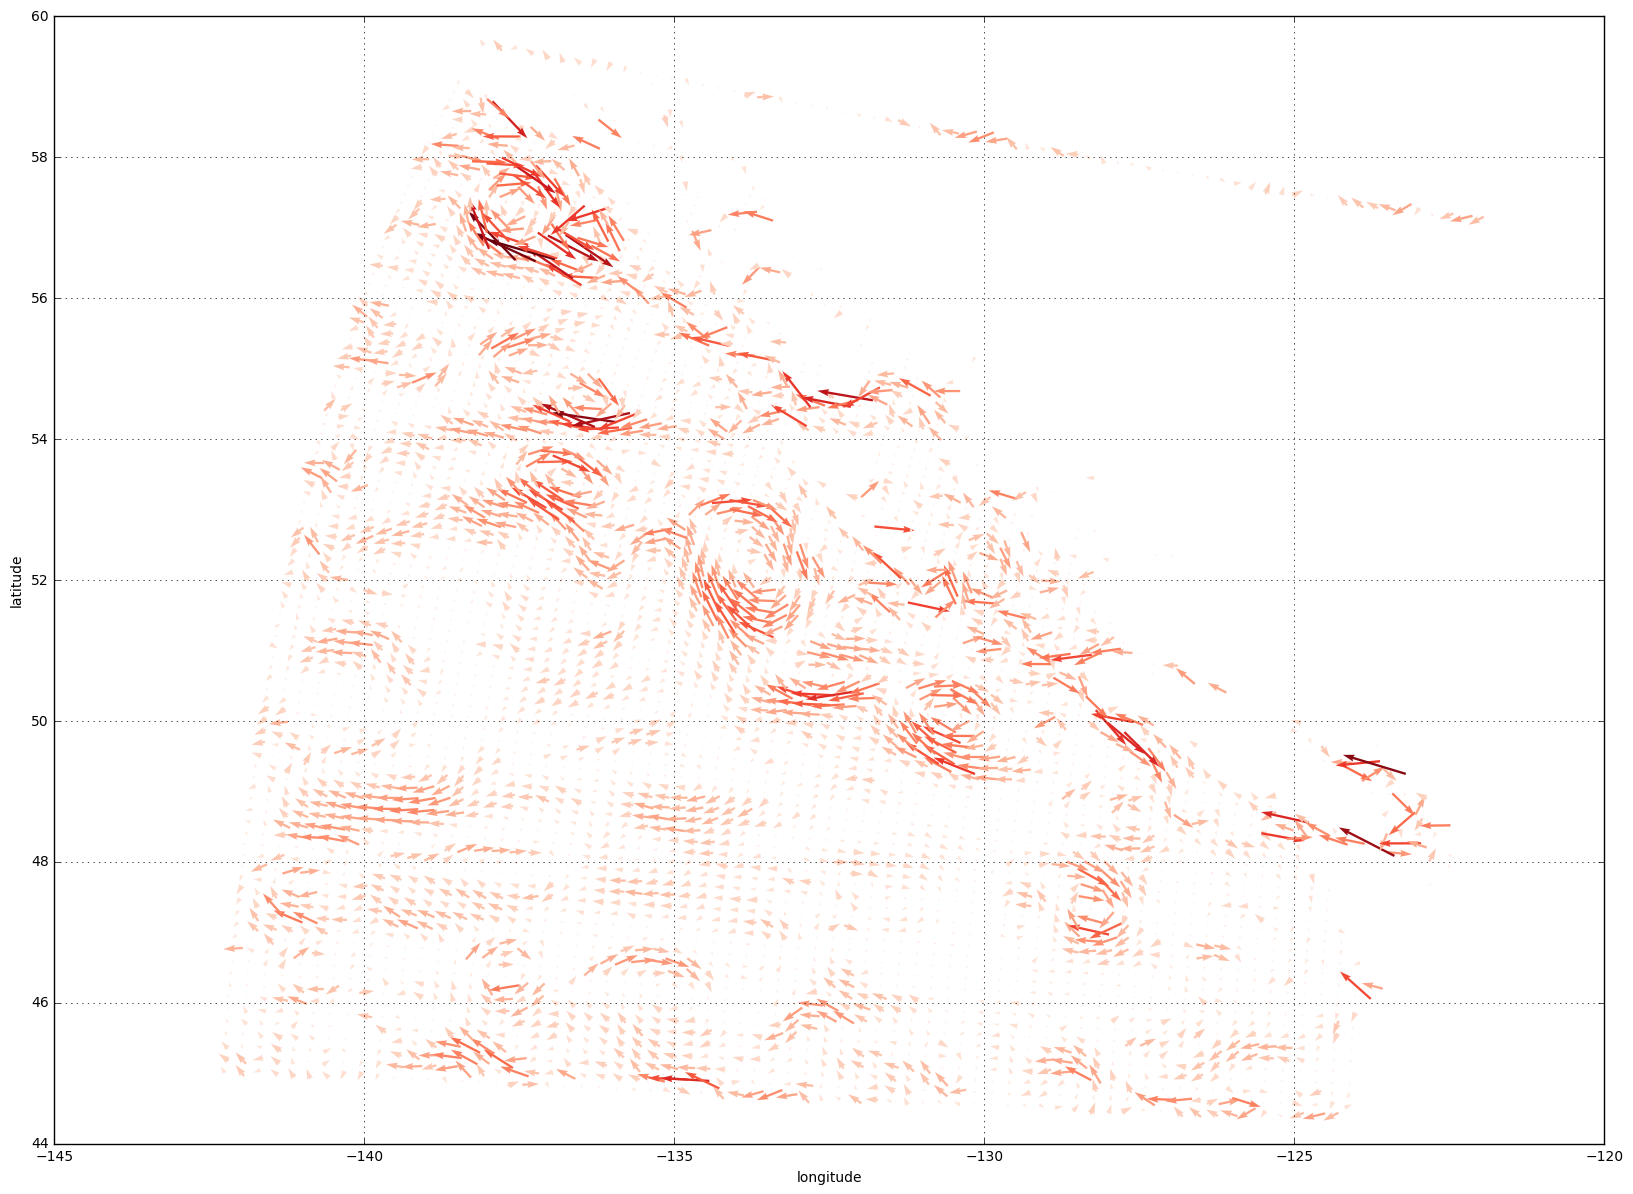

In [78]:
#From the E-N grid


# mask the arrays
u_unrotated_masked = np.ma.masked_values(u_unrotated[...], 0)
v_unrotated_masked = np.ma.masked_values(v_unrotated[...], 0)

speeds = np.sqrt(np.square(u_unrotated_masked) + np.square(v_unrotated_masked))

# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
viz_tools.set_aspect(ax)


arrowsteps = 10
x_slice = u_unrotated_masked[::arrowsteps,::arrowsteps]
y_slice = v_unrotated_masked[::arrowsteps,::arrowsteps]
speed_slice = speeds[::arrowsteps, ::arrowsteps]
xjt=glamt[::arrowsteps, ::arrowsteps]
yjt=gphit[::arrowsteps, ::arrowsteps]
quiver = ax.quiver(xjt,yjt,x_slice, y_slice, speed_slice, pivot='mid', cmap='Reds', width=0.0015)
ax.grid()
# Axes label and title
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.quiverkey(quiver, 252, 302, 4, '0.25 m/s', coordinates='data', color='blue', labelcolor='blue')

## 4) Now we need to calculate the bearing angle of our WCVI grid (crescent grid)


 <img src="files/WCVI_Grid.png">

In [25]:
fname_coord_WCVI = "/ocean/ssahu/CANYONS/wcvi/grid/coordinates.nc"


with nc.Dataset(fname_coord_WCVI, 'r') as cnc_wcvi:
    glamt_wcvi = cnc_wcvi.variables['glamt'][0,:]; gphit_wcvi = cnc_wcvi.variables['gphit'][0,:]
    glamu_wcvi = cnc_wcvi.variables['glamu'][0,:]; gphiu_wcvi = cnc_wcvi.variables['gphiu'][0,:]
    glamv_wcvi = cnc_wcvi.variables['glamv'][0,:]; gphiv_wcvi = cnc_wcvi.variables['gphiv'][0,:]
    
#print(glamt_wcvi.shape)

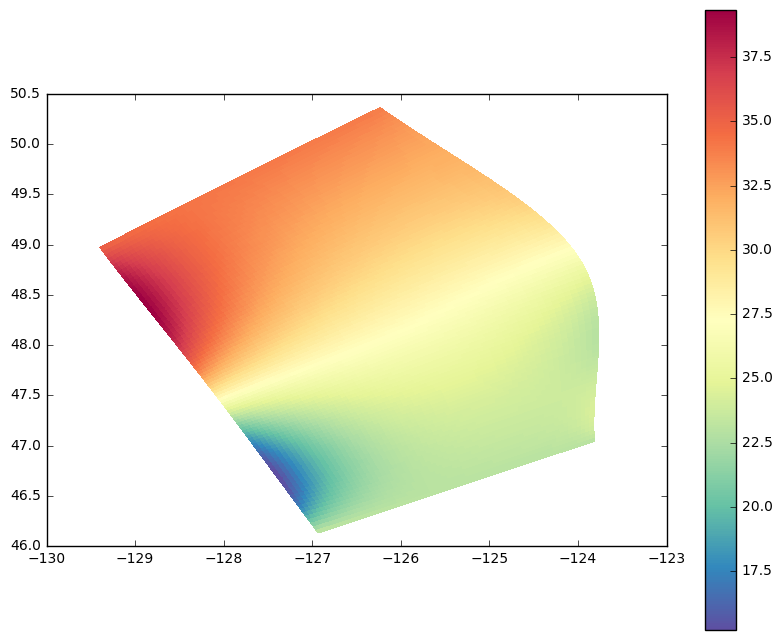

In [81]:
# First point
lonA_wcvi = glamu_wcvi[:,0:-1]
latA_wcvi = gphiu_wcvi[:,0:-1]
# Second point
lonB_wcvi = glamu_wcvi[:,1:]
latB_wcvi = gphiu_wcvi[:,1:]


bearing_wcvi = cibc((latA_wcvi,lonA_wcvi),(latB_wcvi,lonB_wcvi))
bearing_wcvi_actual = 90 - bearing_wcvi

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(glamu_wcvi[:,1:], gphiu_wcvi[:,1:],bearing_wcvi_actual, cmap =cm.Spectral_r)
fig.colorbar(mesh)

#### Let's see how it compares with the orthogonality computation from seagrid for our JP's grid 

##### We see that the points which deviate much from orthogonality are onees where bearing is maximum (NOTE HERE THAT BEARING IS CALCULATED FROM THE VERY NEXT GRID POINT ALONG X DIRECTION, so the more it deviates from orthogonality constraints the more the bearing will change at those points from the bearing angles in the rest of the domain)

 <img src="files/WCVI_orthogonality.png">

## 5) Now we need to interpolate the u and v velocities (unrotated) from JP's T points to our WCVI T points



In [27]:
print(u_unrotated.shape)

print(glamt.shape)

glamt_cut_JP = glamt[1:,1:]

gphit_cut_JP = gphit[1:,1:]


print(glamt_cut_JP.shape)

print(glamt_wcvi.shape)

#Check NEMO manual about where it computes the U and Velocities comapred to the T points in the grid

(1020, 714)
(1021, 715)
(1020, 714)
(100, 70)


In [28]:
X = glamt_cut_JP.flatten()

Y = gphit_cut_JP.flatten()

points = (X[:],Y[:])

xi = (glamt_wcvi.flatten(), gphit_wcvi.flatten())


u_unrotated_wcvi_t = np.reshape(griddata(points, u_unrotated.flatten(), xi, method= 'linear'), glamt_wcvi.shape)


v_unrotated_wcvi_t = np.reshape(griddata(points, v_unrotated.flatten(), xi, method= 'linear'), glamt_wcvi.shape)


## 6) We need to rotate them by the angle of WCVI to align them with the WCVI grid

In [29]:
mag_vel_at_wcvi = np.sqrt(np.multiply(u_unrotated_wcvi_t,u_unrotated_wcvi_t), np.multiply(v_unrotated_wcvi_t,v_unrotated_wcvi_t))


ang_vel_at_wcvi = np.degrees(np.arctan2(v_unrotated_wcvi_t, u_unrotated_wcvi_t))


print(ang_vel_at_wcvi.shape)

print(mag_vel_at_wcvi.shape)

print(bearing_wcvi_actual.shape)




(100, 70)
(100, 70)
(100, 69)


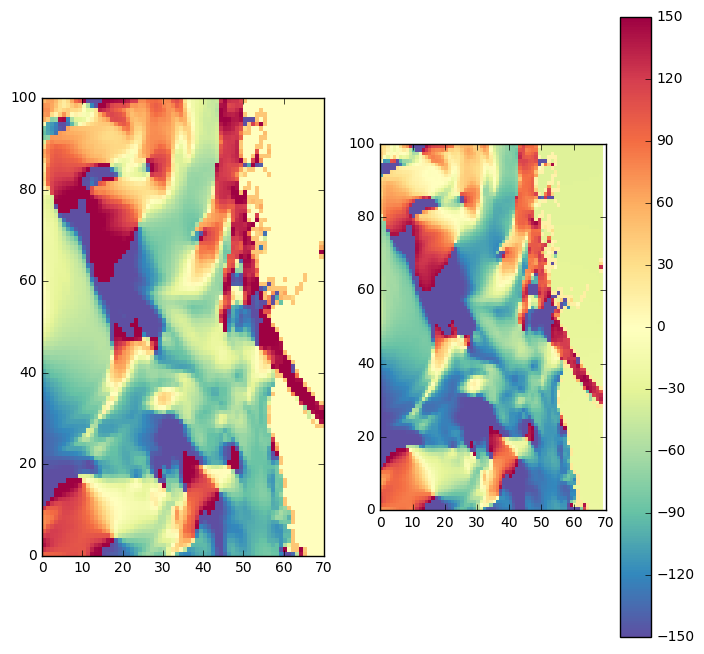

In [30]:
angle_unrotated_wcvi = ang_vel_at_wcvi[:,1:] - bearing_wcvi_actual;

#angle_unrotated_wcvi = bearing_wcvi_actual

fig, (ax0, ax1) = plt.subplots(ncols=2,figsize=(8, 8))

mesh = ax0.pcolormesh(ang_vel_at_wcvi, cmap =cm.Spectral_r, vmin=-150, vmax=150)
viz_tools.set_aspect(ax0)
#fig.colorbar(mesh)

mesh = ax1.pcolormesh(angle_unrotated_wcvi, cmap =cm.Spectral_r, vmin=-150, vmax=150)
viz_tools.set_aspect(ax1)
fig.colorbar(mesh,ax = ax1)

plt.draw()
plt.show()

In [31]:
u_unrotated_rotated_to_wcvi = mag_vel_at_wcvi[:,1:]*(np.cos(np.radians(angle_unrotated_wcvi)))

v_unrotated_rotated_to_wcvi = mag_vel_at_wcvi[:,1:]*(np.sin(np.radians(angle_unrotated_wcvi)))



## 7) We need to interpolate them back to the U and V velocity points of the WCVI grid (stagger them)

In [32]:
def stagger(ugrid, vgrid):
    u = np.add(ugrid[:,:-1], ugrid[:, 1:]) / 2
    v = np.add(vgrid[-1, :], vgrid[1:, :]) / 2
    return u[1:, :], v[:, 1:]





In [33]:
u_rotated_WCVI, v_rotated_WCVI = stagger(u_unrotated_rotated_to_wcvi, v_unrotated_rotated_to_wcvi)

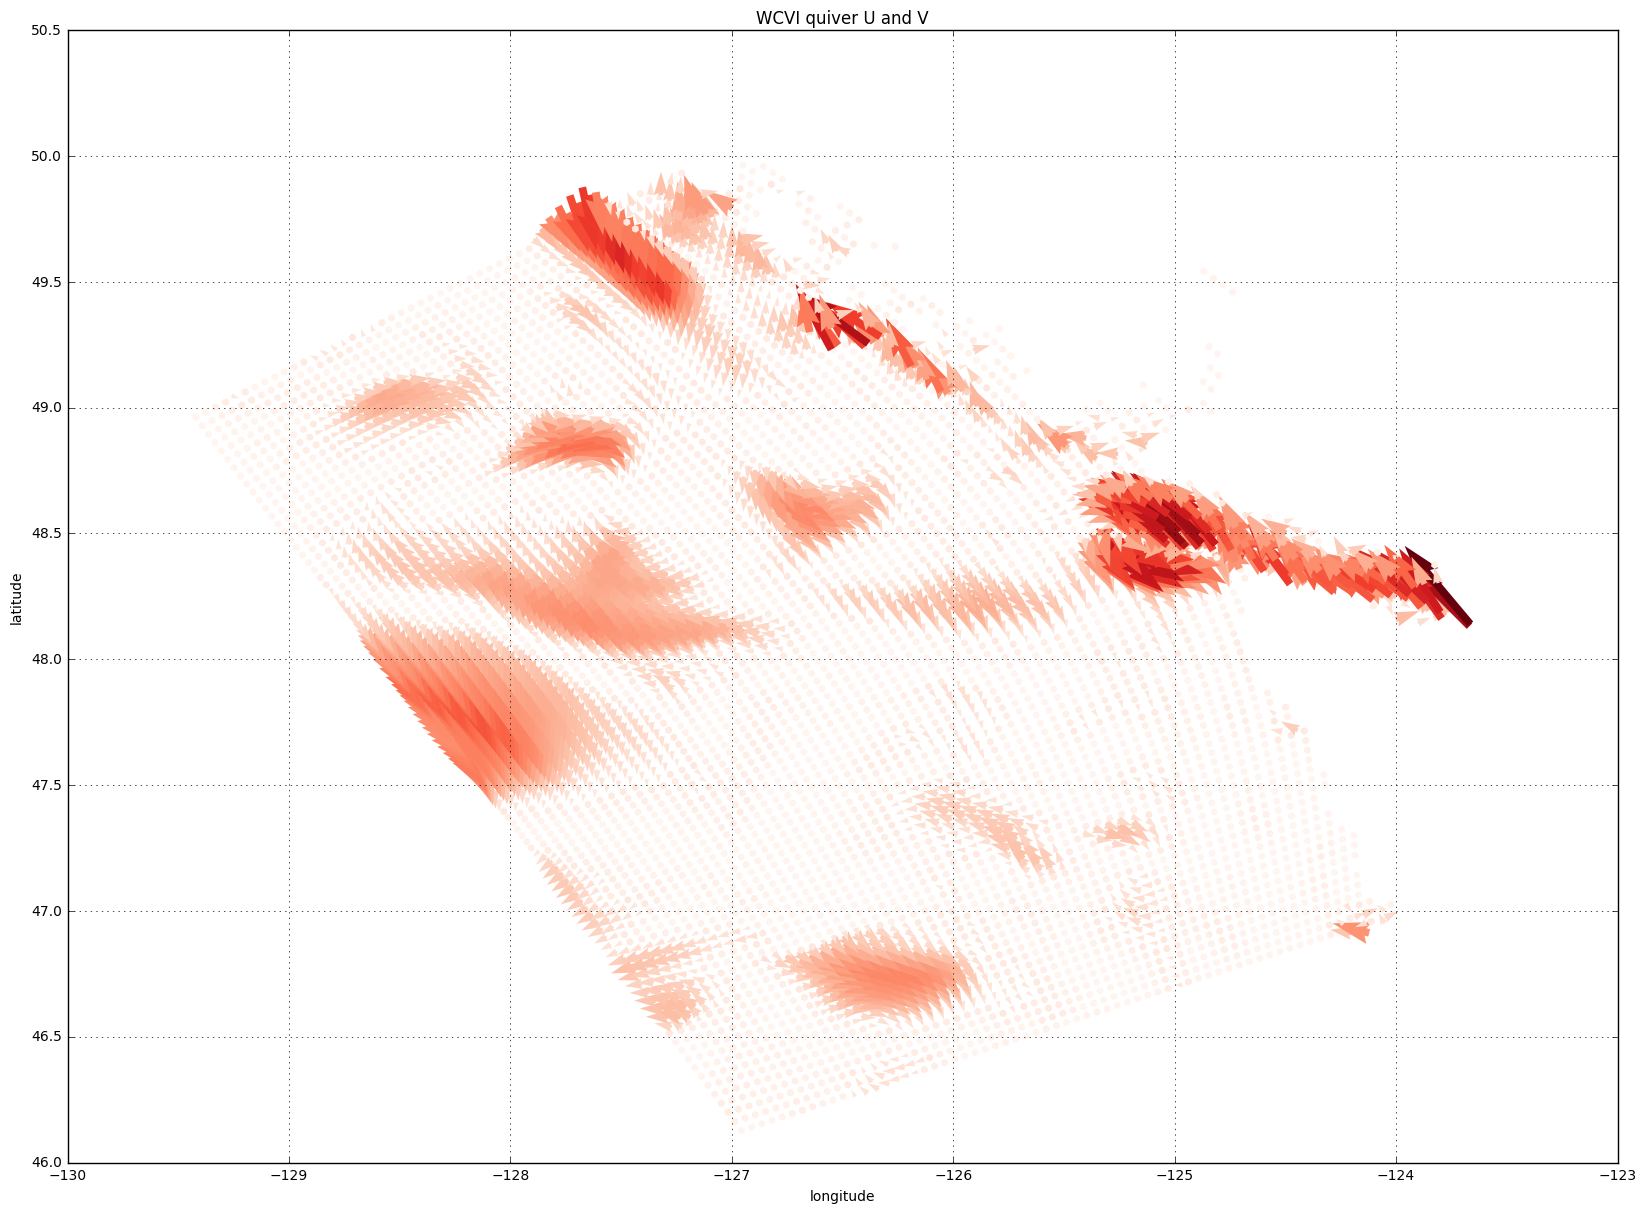

In [99]:
speeds_wcvi = np.sqrt(np.square(u_unrotated_rotated_to_wcvi) + np.square(v_unrotated_rotated_to_wcvi))


u_unrotated_rotated_to_wcvi = np.ma.masked_values(u_unrotated_rotated_to_wcvi, 0)
v_unrotated_rotated_to_wcvi = np.ma.masked_values(v_unrotated_rotated_to_wcvi, 0)

# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
viz_tools.set_aspect(ax)
quiver = ax.quiver(glamt_wcvi[:, 1:], gphit_wcvi[:,1:],u_unrotated_rotated_to_wcvi, v_unrotated_rotated_to_wcvi, speeds_wcvi, pivot='mid', cmap='Reds', width=0.005)
#plt.pcolormesh(speeds_wcvi)
ax.grid()
# Axes label and title
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.quiverkey(quiver, 252, 302, 4, '0.25 m/s', coordinates='data', color='blue', labelcolor='blue')
plt.title('WCVI quiver U and V')

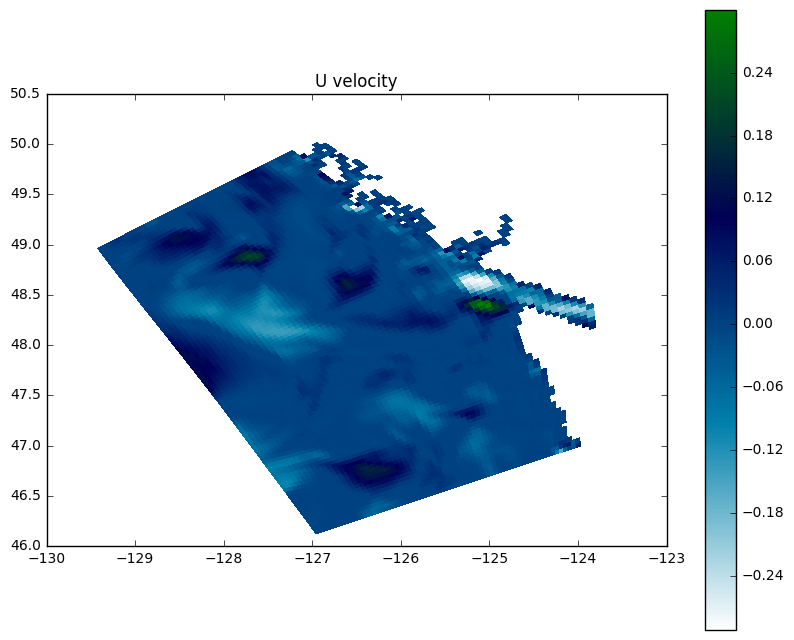

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(glamt_wcvi[:, 1:], gphit_wcvi[:,1:],u_unrotated_rotated_to_wcvi, cmap =cm.ocean_r)
fig.colorbar(mesh)
plt.title('U velocity')

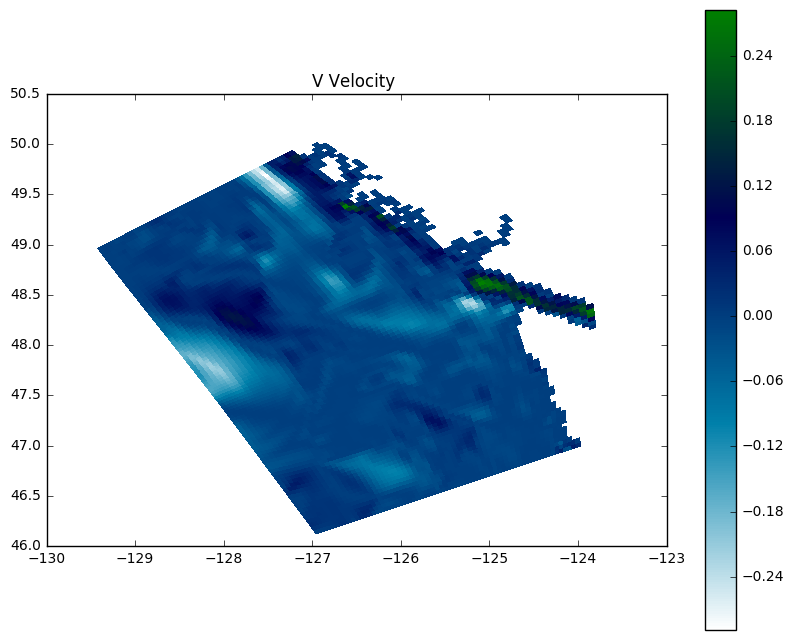

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(glamt_wcvi[:, 1:], gphit_wcvi[:,1:],v_unrotated_rotated_to_wcvi, cmap =cm.ocean_r)
fig.colorbar(mesh)
plt.title('V Velocity ')

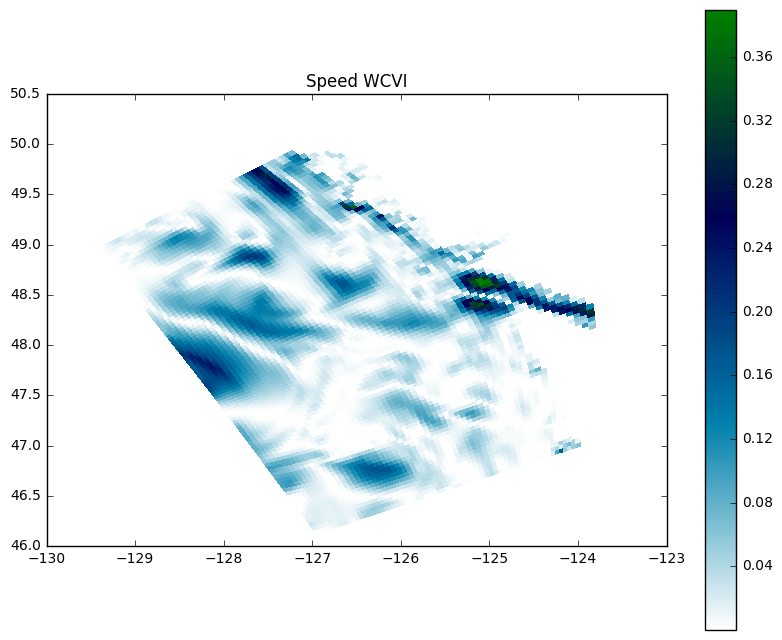

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(glamt_wcvi[:, 1:], gphit_wcvi[:,1:],speeds_wcvi, cmap =cm.ocean_r)
fig.colorbar(mesh)
plt.title('Speed WCVI')

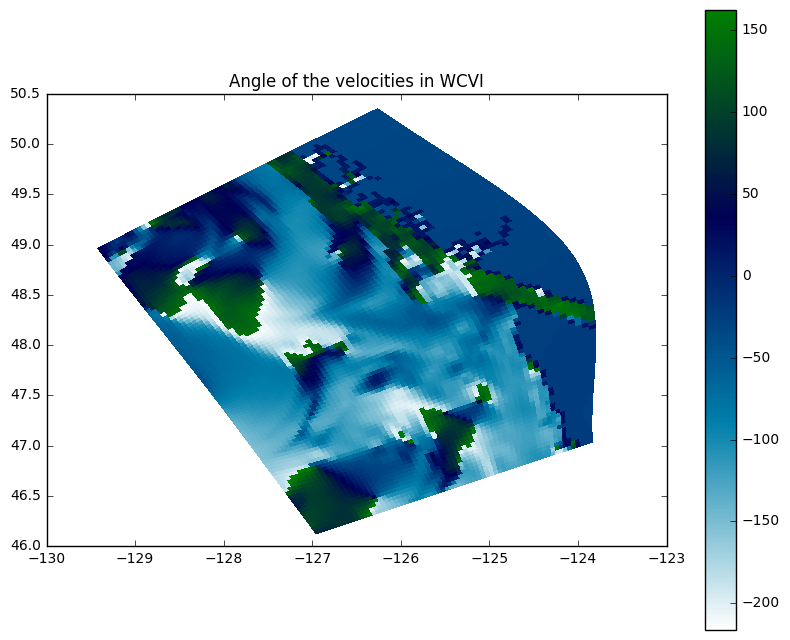

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(glamt_wcvi[:, 1:], gphit_wcvi[:,1:],angle_unrotated_wcvi, cmap =cm.ocean_r)
fig.colorbar(mesh)
plt.title('Angle of the velocities in WCVI')

In [37]:
u_unrotated_rotated_to_wcvi.shape

(100, 69)